In [1]:
import pandas as pd
dfr = pd.read_csv('mosleh_et_al_data.xls')
df = dfr.copy()
df

,politics_sites2,politics_sites1,politics_followed,lowqual_pr2019_crowd,lowqual_pr2019_fc,lowqual_afm,lowqual_mbfc,lowqual_lasser2019,suspended,politics_hashtag,...,valence_neg,valence_neu,valence_pos,politics_sites2_ideo_std,hashtag_ideo_std,barbera_std,politics_sites1_std,repeated_tweet_count,freq_pr_1h,bad_domain_count
0,-0.231902,-1.168745,-0.080295,0.598883,0.279221,0.185315,0.292807,0.350000,0,0,...,0.109935,0.813230,0.076835,0.274317,0.00000,0.909460,69,86.0,30,7
1,0.405261,1.060905,2.296375,0.774873,0.848639,0.614156,0.513147,0.975087,0,1,...,0.115985,0.793715,0.090250,0.351800,0.00000,0.157056,623,133.0,26,20
2,-0.171067,-0.500076,-2.312730,0.548727,0.242347,0.130950,0.242445,0.300000,0,0,...,0.085765,0.817340,0.096915,0.279591,0.00000,0.445349,32,3.0,3,6
3,-0.085814,-0.748035,-1.507481,0.611501,0.360119,0.180055,0.277793,0.316038,0,0,...,0.108680,0.781135,0.110190,0.290277,0.00000,0.256665,55,104.0,29,22
4,0.595367,1.347730,2.010573,0.700217,0.698661,0.430655,0.554609,0.763889,0,1,...,0.065145,0.860550,0.074320,0.300823,0.00000,0.431149,37,36.0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,-0.115066,-0.604443,NaN,0.559728,0.257015,0.167228,0.473955,0.336758,1,0,...,0.087090,0.863170,0.049770,0.206279,0.00000,NaN,134,724.0,22,3
8996,0.499673,1.019845,1.689321,0.703698,0.720918,0.399594,0.568832,0.772321,1,1,...,0.067430,0.843105,0.089495,0.300414,0.00000,0.890596,66,71.0,27,14
8997,-0.214569,-0.925605,NaN,0.627648,0.400227,0.217915,0.303897,0.355212,1,0,...,0.083680,0.849685,0.066635,0.283650,0.57735,NaN,240,99.0,22,46
8998,0.424927,0.925060,1.525494,0.764551,0.808780,0.388632,0.462972,0.863636,1,1,...,0.112050,0.808630,0.079320,0.332652,0.00000,0.900122,32,210.0,15,22


In [2]:
!pip install scipy


Defaulting to user installation because normal site-packages is not writeable


In [3]:
##1st
#Twitter Suspensions after the 2020 Election

from scipy.stats import chi2_contingency

#crosstabulation 
table = pd.crosstab(df['politics_hashtag'], df['suspended'])

# calculating suspension rate
suspension_rate = table.div(table.sum(axis=1), axis=0)
likelihood_ratio = suspension_rate[1][1] / suspension_rate[1][0]

# Format likelihood ratio
likelihood_ratio_int = int(likelihood_ratio)  
likelihood_ratio_rounded = round(likelihood_ratio, 2) 
print(f"\nAccounts using #Trump2020 were about {likelihood_ratio_rounded} times more likely to be suspended compared to #VoteBidenHarris2020.")


#x^2 testing if the results are statistically significant
chi2, p, dof, expected = chi2_contingency(table)
print("\nChi-Squared Test Results:")
print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

if p < 0.05:
    print("\nThe difference in suspension rates is statistically significant (p < 0.05)")
else:
    print("\nThe difference in suspension rates is not statistically significant (p >= 0.05)")



Accounts using #Trump2020 were about 4.4 times more likely to be suspended compared to #VoteBidenHarris2020.

Chi-Squared Test Results:
Chi2: 485.46706126582285, p-value: 1.3808204811294585e-107, Degrees of Freedom: 1
Expected Frequencies:
[[3954.60111111  540.39888889]
 [3963.39888889  541.60111111]]

The difference in suspension rates is statistically significant (p < 0.05)


It can be observed from the crosstabulation that many accounts, which shared #Trump2020 during the election, were found to be 4.4 times more likely to be suspended, while other accounts, which shared #VoteBidenHarris2020, had a lower chance of suspension. There a strong correlation between the likelihood of suspension, and the usage of hashtags.

A very small p-value (1.3808204811294585e-107) indicates that the noticeable differences in suspension rates between the two groups are statistically important, something that shows that it is very unlikely for the observed link between hashtag use and suspension to have happened by chance. The relationship between suspension and hashtag usage exists because it depends on the people whom they support.

In [4]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


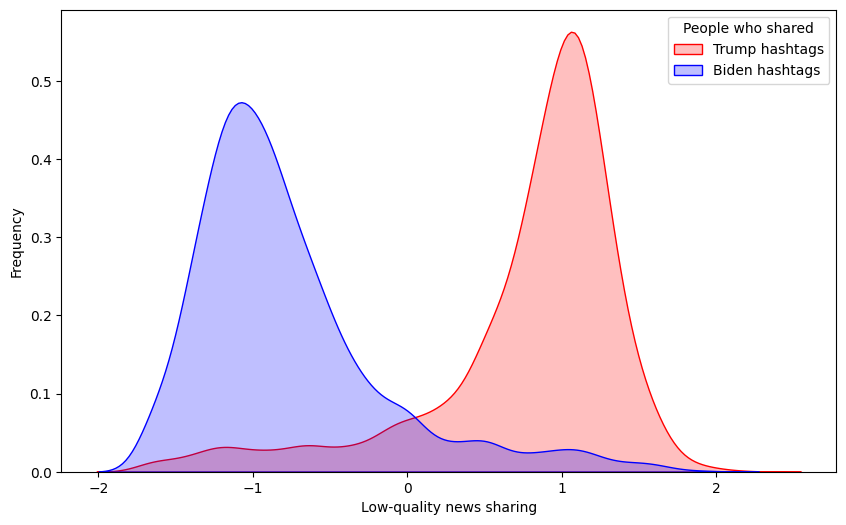

In [5]:
##2nd
#Distributions of Relative Frequency of Low Quality
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

#Plot for low-quality 
# Fill the NaN values with the column's mean
df['lowqual_pr2019_fc'] = df['lowqual_pr2019_fc'].fillna(df['lowqual_pr2019_fc'].mean())
# find z=scores
df['lowqual_pr2019_fc_z'] = zscore(df['lowqual_pr2019_fc'])

# palette labels and colours
custom_palette = {0: 'blue', 1: 'red'} 

# making the plot
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x='lowqual_pr2019_fc_z',
    hue='politics_hashtag',
    palette=custom_palette,
    fill=True,  # Fill the area under the curves with color   
)

plt.xlabel('Low-quality news sharing')
plt.ylabel('Frequency')
plt.legend(title='People who shared', labels=['Trump hashtags', 'Biden hashtags'])
plt.show()

We can see that the distribution for users sharing Trump hashtags indicates a greater tendency toward low-quality news sharing compared to Biden hashtag users. Biden hashtag distribution suggestes relatively less sharing of low-quality news.
So overlap exists between the two distributions but is limited, implying a significant difference in behaviors between the two groups.

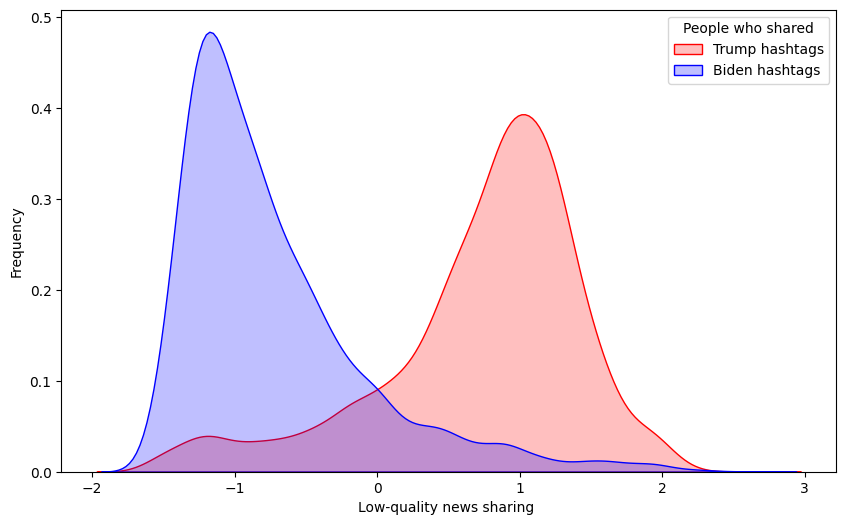

In [6]:
#Plot for low-quality sharing as determined by crowdsourcing from 971 participants

# Fill the NaN values with the column's mean
df['lowqual_pr2019_crowd'] = df['lowqual_pr2019_crowd'].fillna(df['lowqual_pr2019_crowd'].mean())
df['lowqual_pr2019_crowd_z'] = zscore(df['lowqual_pr2019_crowd'])

# palette labels and colours
custom_palette = {0: 'blue', 1: 'red'} 

#plot
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x='lowqual_pr2019_crowd_z',
    hue='politics_hashtag',
    palette=custom_palette,
    fill=True, 
)

plt.xlabel('Low-quality news sharing ')
plt.ylabel('Frequency')
plt.legend(title='People who shared', labels=['Trump hashtags', 'Biden hashtags'])
plt.show()


As we observe the patterns remain consistent with the fact-checker plot, which again shows more varied low-quality sharing from Trump hashtag and a tendency from Biden hashtag to avoid low-quality news sharing.
The overlap is larger in this case, which shows that crowd-sourced ratings might capture a broader spectrum of low-quality sharing behavior.

All in all both plots highlight a distinct behavioral divide between the two groups, with Trump hashtag sharers more associated with low-quality news sharing.

In [7]:
from scipy.stats import ttest_ind
#t-statistic for the two groups for columns lowqual_pr2019_fc_z and lowqual_pr2019_crowd_z

# filter for lowqual_pr2019_fc_z
group_fc_0 = df[df['politics_hashtag'] == 0]['lowqual_pr2019_fc_z']
group_fc_1 = df[df['politics_hashtag'] == 1]['lowqual_pr2019_fc_z']

# T-test (Welch's)
t_stat_fc, p_value_fc = ttest_ind(group_fc_0, group_fc_1, equal_var=False)  
print(f"T-test for 'lowqual_pr2019_fc_z':\nT-statistic = {t_stat_fc:.3f}, P-value = {p_value_fc:.3e}")

# Filter for lowqual_pr2019_crowd_z
group_crowd_0 = df[df['politics_hashtag'] == 0]['lowqual_pr2019_crowd_z']
group_crowd_1 = df[df['politics_hashtag'] == 1]['lowqual_pr2019_crowd_z']

# T-test (Welch's)
t_stat_crowd, p_value_crowd = ttest_ind(group_crowd_0, group_crowd_1, equal_var=False)  
print(f"T-test for 'lowqual_pr2019_crowd_z':\nT-statistic = {t_stat_crowd:.3f}, P-value = {p_value_crowd:.3e}")


T-test for 'lowqual_pr2019_fc_z':
T-statistic = -118.651, P-value = 0.000e+00
T-test for 'lowqual_pr2019_crowd_z':
T-statistic = -102.106, P-value = 0.000e+00


In [8]:
##3
#Low-quality News Sharing on Twitter
import numpy as np
from scipy.stats import mstats

# function calculating pooled standard deviation
def pooled_std(s1, s2, n1, n2):
    return np.sqrt((((n1 - 1) * s1**2) + ((n2 - 1) * s2**2)) / (n1 + n2 - 2))

# function calculating Cohen's d
def cohen_d(mean1, mean2, std_pooled):
    return (mean1 - mean2) / std_pooled

# function calculating Hedges' g
def hedges_g(d, n1, n2):
    correction_factor =( 1 - (3 / (4 * (n1 + n2) - 9))) * d
    return correction_factor

lowqual_columns = [
    'lowqual_pr2019_fc',
    'lowqual_afm',
    'lowqual_mbfc',
    'lowqual_lasser2019',
    'lowqual_pr2019_crowd',
    'lowqual_pr2019_crowdrep',
]


results = []

# Loop through each column and perform t-test, Cohen's d, and Hedges' g
for column in lowqual_columns: 
    df[column] = df[column].fillna(df[column].mean()) # Fill NaN values 
    df[column+'_z'] = zscore(df[column])  #Z-score normalization
    
    # Get the data for each group 
    group_0 = df[df['politics_hashtag'] == 0][column+'_z'].values
    group_1 = df[df['politics_hashtag'] == 1][column+'_z'].values

    # t-test
    t_stat, p_value = ttest_ind(group_0, group_1, equal_var=False)
    
    mean_0, mean_1 = group_0.mean(), group_1.mean()
    std_0, std_1 = group_0.std(), group_1.std()
    n_0, n_1 = len(group_0), len(group_1)
    pooled_std_dev = pooled_std(std_0, std_1, n_0, n_1) # calculating pooled std
    d = cohen_d(mean_1, mean_0, pooled_std_dev) #calculating Cohen's d
    g = hedges_g(d, n_0, n_1) #calculating Hedges' g
    
    # Append results
    results.append({
        'Column': column+'_z',
        't-statistic': t_stat,
        'p-value': p_value,
        "Cohen's d": d,
        "Hedges' g": g
    })

# Display results in a DataFrame
results_df = pd.DataFrame(results)
print(results_df)


                      Column  t-statistic  p-value  Cohen's d  Hedges' g
0        lowqual_pr2019_fc_z  -118.651444      0.0   2.501554   2.501346
1              lowqual_afm_z  -102.697814      0.0   2.164596   2.164416
2             lowqual_mbfc_z   -97.577539      0.0   2.057534   2.057363
3       lowqual_lasser2019_z  -102.677798      0.0   2.163811   2.163630
4     lowqual_pr2019_crowd_z  -102.106033      0.0   2.152624   2.152445
5  lowqual_pr2019_crowdrep_z   -60.996139      0.0   1.285991   1.285884


The two political groups share differing metrics of low-quality news and because all t-tests show extremely low p-values (𝑝 < 0.001), we can conclude that these differences are statistically important.
Cohen's 𝑑, and Hedges' 𝑔 show that many metrics have effect sizes above 2, which indicates extremely large effects. For lowqual_pr2019_fc_z, lowqual_afm_z, lowqual_mbfc_z, lowqual_lasser2019_z, and lowqual_pr2019_crowd_z, the effect sizes suggest a very large difference in low-quality news sharing behaviors between the groups. The only column which shows a difference in d and g is lowqual_pr2019_crowdrep_z with (1.29 < 2) which still represents a large effect.
These large effect sizes indicate meaningful behavioral differences and demonstrate a strong difference in low-quality news sharing across the two political groups.

In [9]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



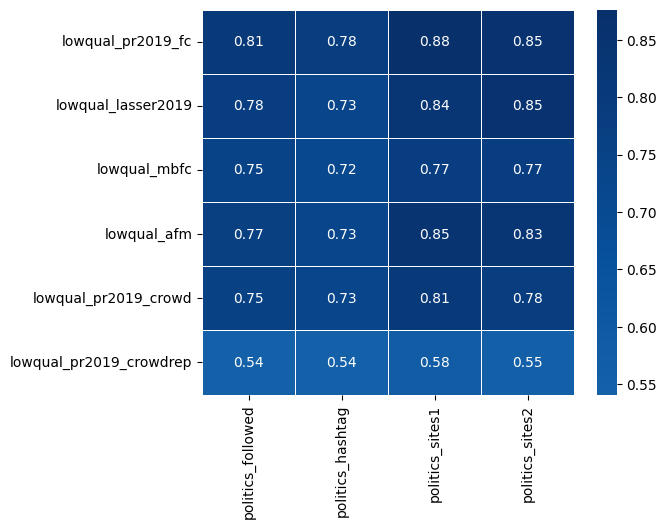

In [10]:
##4
#Sharing Lower-quality News Sources and Conservative Ideology

columns_1 = [
    'lowqual_pr2019_fc',
    'lowqual_lasser2019',
    'lowqual_mbfc',
    'lowqual_afm',
    'lowqual_pr2019_crowd',
    'lowqual_pr2019_crowdrep',
]
columns_2 = [
    'politics_followed',
    'politics_hashtag',
    'politics_sites1',
    'politics_sites2',
]

correlation_matrix = dfr.corr(method='pearson') # Correlation matrix 

# Filter the correlation matrix to only include the columns we want
correlation_matrix = correlation_matrix.loc[columns_1 , columns_2]

# Plot the matrix
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', center=0, fmt=".2f", linewidths=0.5)
plt.show()



In the heatmap are observed some strong Positive Correlations which have most measures of low-quality news sharing (lowqual_pr2019_fc, lowqual_lasser2019, lowqual_mbfc, lowqual_afm, lowqual_pr2019_crowd) show strong positive correlations (values from 0.73 to 0.85) with:
politics_followed which indicates that users with conservative followings tend to share more low-quality news, politics_hashtag showing that hashtag usage is similarly linked to higher low-quality sharing.

Also politics_sites1 and politics_sites2 have strong correlations between 0.77 and 0.85 with most low-quality metrics which suggest users sharing conservative leaning sites are more likely to share low-quality news.

lowqual_pr2019_crowdrep from the other side has weaker correlations (0.54 to 0.58) across all conservative ideology indicators, indicating lower reliability on specific behaviors for instanse repeated sharing.

lowqual_pr2019_fc with politics_sites2 (0.85) and lowqual_afm with politics_sites1 (0.85) have the highest correlations.

The analysis confirms a strong correlation between sharing low-quality news sources and conservative ideology. Only the lowqual_pr2019_crowdrep metric appears to be an outlier with comparatively weaker correlations.

In [11]:
pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Mean AUC: 0.703
95% Confidence Interval: [0.683, 0.720]


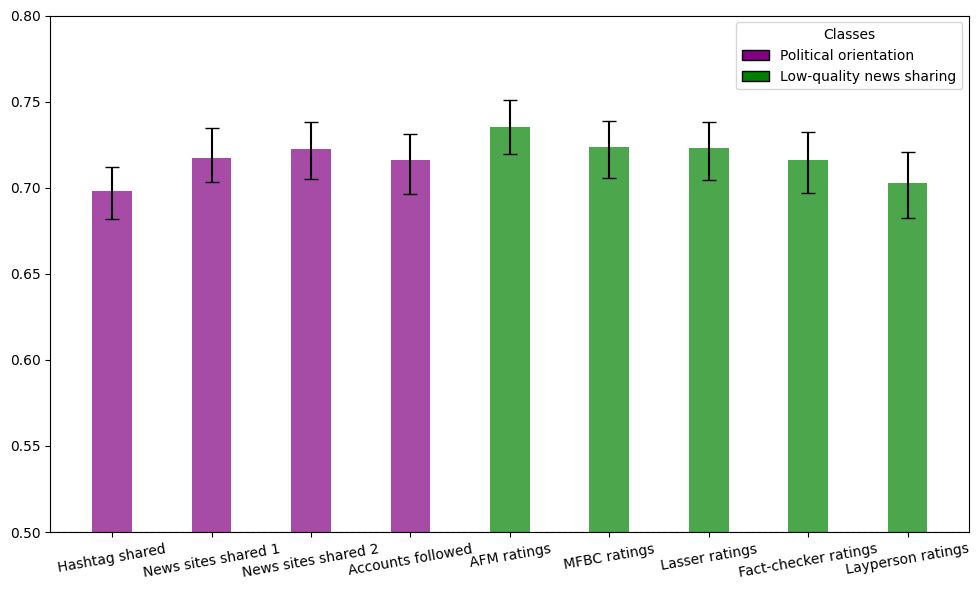

In [12]:
##5
#News Sharing Can Help Explain Suspension, Using Single Predictors (Probit model)
import statsmodels.api as sm
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score

predictors = [
    'politics_hashtag', 'politics_sites1', 'politics_sites2', 'politics_followed',
    'lowqual_afm', 'lowqual_mbfc', 'lowqual_lasser2019',
    'lowqual_pr2019_fc', 'lowqual_pr2019_crowd'
]

for col in predictors:
    dfr = dfr.dropna(subset=[col])    #Drop NaN values in every column
    dfr[col] = zscore(dfr[col])


#  Probit Model Function
def fit_probit_and_evaluate_auc(X, y):
    probit_model = sm.Probit(y, X).fit(disp=False)  # Fit the model
    predictions = probit_model.predict(X)  # Get predicted probabilities
    auc = roc_auc_score(y, predictions)  # Calculating AUC
    return auc

# doing 100 iterations
iterations = 100
results = []

for predictor in predictors:
    X = sm.add_constant(dfr[[predictor]])  # Use only the current predictor
    y = dfr['suspended']

    bootstrap_aucs = []
    for i in range(iterations):
        # Sample indices with replacement
        resampled_indices = resample(X.index, random_state=i)
        X_resampled = X.loc[resampled_indices]
        y_resampled = y.loc[resampled_indices]

 # valuating the probit model
        if X_resampled.shape[0] > 0:
            auc = fit_probit_and_evaluate_auc(X_resampled, y_resampled)
            bootstrap_aucs.append(auc)

# Calculate mean AUC and confidence intervals
    mean_auc = np.mean(bootstrap_aucs)
    ci_lower = np.percentile(bootstrap_aucs, 2.5)
    ci_upper = np.percentile(bootstrap_aucs, 97.5)
    results.append((predictor, mean_auc, ci_lower, ci_upper))

results_df = pd.DataFrame(results, columns=['Predictor', 'Mean AUC', 'CI Lower', 'CI Upper'])

# making the Plot
plt.figure(figsize=(10, 6))
bar_width = 0.4
categories = ['Political orientation'] * 4 + ['Low-quality news sharing'] * 5
colors = ['purple' if cat == 'Political orientation' else 'green' for cat in categories]

plt.bar(
    results_df['Predictor'], 
    results_df['Mean AUC'], 
    yerr=[results_df['Mean AUC'] - results_df['CI Lower'], results_df['CI Upper'] - results_df['Mean AUC']],
    color=colors, alpha=0.7, capsize=5, width=bar_width
)

plt.axhline(y=0.5, color='black', linestyle='--', linewidth=0.8)  # Add baseline
plt.ylim(0.5, 0.8)
# names for the x-axis
custom_labels = [
    'Hashtag shared', 'News sites shared 1', 'News sites shared 2', 'Accounts followed',
    'AFM ratings', 'MFBC ratings', 'Lasser ratings',
    'Fact-checker ratings', 'Layperson ratings'
]
plt.xticks(ticks=np.arange(len(results_df['Predictor'])), labels=custom_labels, rotation= 10, ha='center')

#  Printing Results
print(f"Mean AUC: {mean_auc:.3f}")
print(f"95% Confidence Interval: [{ci_lower:.3f}, {ci_upper:.3f}]")

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='purple', edgecolor='black', label='Political orientation'),
    Patch(facecolor='green', edgecolor='black', label='Low-quality news sharing')
]
plt.legend(handles=legend_elements, title="Classes", loc='best')
plt.tight_layout()
plt.show()


Highest AUC among political orientation predictors (purple bars), which is close to 0.73, implies that the political leanings inferred from followed accounts strongly correlate with suspension.

Highest AUC among low-quality predictors (green bars) which is close to 0.74, highlights the strength of professional fact-checking as a tool to identify suspension-prone users.

Stronger predictors among political orientation predictors seem to be News sites shared 2 with AUC ~0.73 and among low-quality news sharing predictors, AFM_ratings with AUC ~0.74.

So as low-quality news sharing predictors (green bars) have slightly higher AUCs than political orientation predictors (purple bars), indicates that sharing low-quality content is more predictive of suspension than political orientation alone.

All predictors show confidence intervals with some degree of overlap, indicating that while differences in AUC exist, they might not always be statistically significant.
Political predictors (Purple Bars) tend to have slightly narrower confidence intervals than the other predictors, reflecting higher reliability in their AUC estimates.

From the analysis we can understand that both political orientation and low-quality news sharing are meaningful predictors of suspension, with low-quality news sharing predictors being more powerful. This reinforces the importance of addressing low-quality content as part of platform enforcement strategies.

In [13]:
##6
#News Sharing Can Help Explain Suspension, Using Multiple Predictors
from scipy.stats.mstats import winsorize

# filling the NaN with column's mean  
df.fillna(df.mean(), inplace=True)

df['log_repeated_tweet_count'] = np.log10(df['repeated_tweet_count'] + 1)
df['log_freq_pr_1h'] = np.log10(df['freq_pr_1h'] + 1)
df['log_num_followers'] = np.log10(df['num_followers'] + 1)
df['log_num_friends'] = np.log10(df['num_friends'] + 1)
df['log_fol'] = np.log10((df['num_friends'] / df['num_followers']) + 1)

df[['log_repeated_tweet_count',	'log_freq_pr_1h',	'log_num_followers',	'log_num_friends',	'log_fol']]

,log_repeated_tweet_count,log_freq_pr_1h,log_num_followers,log_num_friends,log_fol
0,1.939519,1.491362,3.369772,3.471145,0.354689
1,2.127105,1.431364,2.975432,3.024075,0.326058
2,0.602060,0.602060,3.485721,3.043362,0.133827
3,2.021189,1.477121,0.778151,1.995635,1.313867
4,1.568202,0.954243,2.914872,3.001301,0.346444
...,...,...,...,...,...
8995,2.860338,1.361728,2.110590,2.045323,0.269367
8996,1.857332,1.447158,3.689486,3.711976,0.312423
8997,2.000000,1.361728,2.485721,2.684845,0.412226
8998,2.324282,1.204120,3.220631,3.337459,0.363396


In [14]:
#winsorizing columns
wins_columns_1 = ['valence_neg', 'valence_neu', 'valence_pos','barbera_std', 'politics_sites1_std', 'politics_sites2_ideo_std']

# winsorizing from both sides at the top 1%
for column in wins_columns_1:
    valid_data = df[column].to_numpy()  # Convert to numpy array
    upper_limit = np.percentile(valid_data, 99)
    lower_limit = np.percentile(valid_data, 1)
    df[column] = np.clip(valid_data, lower_limit, upper_limit) # Clip to limits

In [15]:
#winsorizing columns
wins_columns_2 = [
    'moral_outrage', 'rewire_abuse', 'rewire_hate', 'rewire_profanity',
    'rewire_violent', 'rewire_sexually_explicit', 'jigsaw_toxicity',
    'jigsaw_severe_toxicity', 'jigsaw_idenity_attack', 'jigsaw_insult',
    'jigsaw_profanity', 'jigsaw_threat'
]
# winsorizing only the upper side at the top 1%
for column in wins_columns_2:
    valid_data = df[column].to_numpy()  # Converting to numpy array
    upper_limit = np.percentile(valid_data, 99)
    df[column] = np.where(valid_data > upper_limit, upper_limit, valid_data)

In [16]:
#PCA with a single PCA component pc1_misinfo, for low quality news sharing
from sklearn.decomposition import PCA

columns = ['lowqual_pr2019_fc', 'lowqual_afm', 'lowqual_lasser2019', 'lowqual_mbfc']

df[columns] = df[columns].apply(zscore)  # Normalize with Z-score

# performing  PCA with a single component
pca = PCA(n_components=1) 
pc1 = pca.fit_transform(df[columns]) # Fit PCA and transform data

df['pc1_misinfo'] = pc1 # Add the principal component pc1_misinfo

# variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio[0]}")

# PCA loadings for the first component PC1
loadings = pd.DataFrame(pca.components_.T, index=columns, columns=['pc1_misinfo'])
print(loadings)


Explained Variance Ratio: 0.8725595303656107
                    pc1_misinfo
lowqual_pr2019_fc      0.500192
lowqual_afm            0.511295
lowqual_lasser2019     0.510841
lowqual_mbfc           0.476893


The Explained Variance Ratio: 0.8725595303656107 shows that the first principal component pc1_misinfo explains 87.25% of the variability in the original data. This is a very high proportion of the variance, showing that the four variables lowqual_pr2019_fc, lowqual_afm, lowqual_lasser2019, lowqual_mbfc are well-represented by this single component.
The new column (pc1_misinfo) is a robust representation of the "low-quality news-sharing" dimension.

In [17]:
#PCA with a single PCA component spc1_politics,for political orientation
politics_columns = ['politics_hashtag', 'politics_followed', 'politics_sites1', 'politics_sites2']
df[politics_columns] = df[politics_columns].apply(zscore) 

# performing  PCA with a single component
pca = PCA(n_components=1) 
pc1_politics = pca.fit_transform(df[politics_columns])

df['pc1_politics'] = pc1_politics.flatten()

# variance ratio
explained_variance_ratio = pca.explained_variance_ratio_[0]
print(f"Explained Variance Ratio: {explained_variance_ratio}")

# SPrint PCA loadings for the first component PC1
loadings = pd.DataFrame(pca.components_.T, index=politics_columns, columns=['pc1_politics'])
print(loadings)

df['extremity'] = np.abs(df['pc1_politics'])# Creating the extremit' variable

df[['pc1_politics', 'extremity']]


Explained Variance Ratio: 0.8795293696695505
                   pc1_politics
politics_hashtag       0.489877
politics_followed      0.490824
politics_sites1        0.511673
politics_sites2        0.507249


,pc1_politics,extremity
0,-1.841564,1.841564
1,2.264580,2.264580
2,-2.105501,2.105501
3,-1.836106,1.836106
4,2.648512,2.648512
...,...,...
8995,-1.222281,1.222281
8996,2.194894,2.194894
8997,-1.570926,1.570926
8998,1.961819,1.961819


The Variance Ratio: 0.8795293696695505 represents the proportion of the total variance that is captured by a particular principal component pc1_politics. So the first principal component pc1_politics explains 87.95% of the variance in the original four political orientation variables 'politics_hashtag', 'politics_followed', 'politics_sites1', 'politics_sites2'.
That's a high explained variance ratio which means that this component captures a significant amount of the information in the original data.
The remaining 12.05% of the variance is explained by the other components, which might be less significant or less important trends in the data.

In [18]:
#PCA with a single PCA componentfor 1 component pc1_fol, for the following columns

inf_value = np.nan # Define inf as NaN to handle them

log_columns = ['log_num_followers', 'log_num_friends', 'log_fol']

# Replace infinite values and NaNs
for col in log_columns:
    df[col] = df[col].replace([np.inf, -np.inf], np.nan)
    mean_value = df[col].mean()  
    df[col] = df[col].fillna(mean_value)  

df[log_columns] = df[log_columns].apply(zscore)

# Perform PCA for 1 component
pca = PCA(n_components=1)  
pc1_fol = pca.fit_transform(df[log_columns])  

df['pc1_fol'] = pc1_fol

# variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio[0]}")

#PCA loadings for the first component PC1
loadings = pd.DataFrame(pca.components_.T, index=log_columns, columns=['pc1_fol'])
print(loadings)


Explained Variance Ratio: 0.7287710876575255
                    pc1_fol
log_num_followers  0.672452
log_num_friends    0.565461
log_fol           -0.477558


Here the Explained Variance Ratio: 0.7287710876575255 shows that the first principal component pc1_fol captures 72.88% of the variance in the data. In other words, 72.88% of the total information (variance) in the data can be explained by the first principal component.
So 72.88% of the information in the dataset is well represented by pc1 which suggests that this component is quite significant in explaining the structure of the data.

In [19]:
#perform PCA for three components, pc1_harmful_language, pc2_harmful_language, pc3_harmful_language on the winsorized data 

columns_harm = [
    'rewire_abuse', 'rewire_hate', 'rewire_profanity', 'rewire_violent', 'rewire_sexually_explicit',
    'jigsaw_toxicity', 'jigsaw_severe_toxicity', 'jigsaw_idenity_attack', 
    'jigsaw_insult', 'jigsaw_profanity', 'jigsaw_threat'
]
# Step 4: Normalize each column with Z-score
df[columns_harm] = df[columns_harm].apply(zscore)

# Step 3: Perform PCA for 3 components
pca = PCA(n_components=3)
pca_components = pca.fit_transform(df[columns_harm])

# Step 4: Add the principal components to the DataFrame
df['pc1_harmful_language'] = pca_components[:, 0]
df['pc2_harmful_language'] = pca_components[:, 1]
df['pc3_harmful_language'] = pca_components[:, 2]

# Step 5: Explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Step 6: PCA loadings (coefficients showing how much each variable contributes to a component)
loadings = pd.DataFrame(pca.components_.T, index=columns_harm, columns=['pc1_harmful_language', 'pc2_harmful_language', 'pc3_harmful_language'])
print("\nPCA Loadings:")
print(loadings)

Explained Variance Ratio: [0.56165516 0.11871969 0.10704444]

PCA Loadings:
                          pc1_harmful_language  pc2_harmful_language  \
rewire_abuse                          0.325307              0.344214   
rewire_hate                           0.235382              0.576548   
rewire_profanity                      0.252556             -0.231750   
rewire_violent                        0.232521              0.067433   
rewire_sexually_explicit              0.125268             -0.536720   
jigsaw_toxicity                       0.385473              0.132353   
jigsaw_severe_toxicity                0.335857             -0.301093   
jigsaw_idenity_attack                 0.306924             -0.049654   
jigsaw_insult                         0.374410              0.137424   
jigsaw_profanity                      0.361709             -0.205053   
jigsaw_threat                         0.280392             -0.176674   

                          pc3_harmful_language  
rewire_abu

PCA for three components

Each principal component (PC) catches a specific portion of the total variance in the data and this is shown by the explained variance ratio, which indicates how much variance is represented.

pc1_harmful_language: Captures 56.1% of the variance. The most important component likely represents a major measure of harmful or toxic content and it is important to understand its effect.

pc2_harmful_language: Captures 11.9% of the variance. This is much smaller than pc1. It adds many details that pc1 can't explain.

pc3_harmful_language: Captures 10.7% of the variance. It plays an important role while also helping us understand the overall pattern in our analysis. This component reveals many aspects of variation in the data. It presents another piece to consider.

About 78.7% of the variance in the data is explained by these three components and this level is fairly high. In these three components, the original variables preserve most of the information, and this is what it means. 

USAGE OF 3 COMPONENTS

Here three components are used instead of one because the harmful language variables capture multiple distinct themes of variation, not just one. While the first principal component pc1_harmful_language explains the majority of the variance (56.1%), adding pc2_harmful_language and pc3_harmful_language allows us to capture additional, meaningful dimensions of the data that would otherwise be lost.

pc1 alone explains 56.1% of the variance, which is significant but leaves 43.9% unexplained. Adding pc2 and pc3 increases the explained variance to 78.7%, preserving more information about the data's structure. With the 3 components we can identify patterns that would be obscured if only one component was used.

The dataset includes different types of harmful content such as toxicity, hate, profanity, sexually explicit language, identity attacks, and threats, these categories don't necessarily all behave the same way. They might follow different patterns compared so using three components ensures these differences are preserved. 

pc1_harmful_language (56.16%) measures general toxicity.
Some variables with strong positive loadings are the jigsaw_toxicity, jigsaw_insult, jigsaw_profanity, rewire_abuse.
Based on that, this component represents a broad measure of general toxicity, capturing abusive, profane, insulting, and toxic behavior across all variables. It reflects the overall harmfulness of language.

pc2_harmful_language (11.87%) measures specific hate content
Variables with strong positive loadings are rewire_hate, rewire_abuse and a variable with a strong negative loading is rewire_sexually_explicit.
So this component highlights a contrast between hate-abuse and sexually explicit content. It shows that these forms of harmful language may not always occur together or follow the same patterns.

pc3_harmful_language (10.7%) identity attacks and threats
Variables with strong positive loadings are jigsaw_identity_attack, jigsaw_threat and variables with strong negative loadings seem to be rewire_profanity, rewire_sexually_explicit. Something that shows that this component isolates identity related attacks and threats as a distinct type of harmful language. It shows that such behavior is different from general toxicity or profanity.

In [20]:
#producing a single PCA component, pc1_valence, for the following winsorized data 

valence_columns = ['valence_neg', 'valence_neu', 'valence_pos']

df[valence_columns] = zscore(df[valence_columns]) #Z-score normalization

# Perform PCA with one component
pca = PCA(n_components=1)
pc1_valence = pca.fit_transform(df[valence_columns])

#  PCA component as a new column
df['pc1_valence'] = pc1_valence

# variance ratio for validation
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# PCA loadings for the first component PC1
loadings = pd.DataFrame(pca.components_.T, index=valence_columns, columns=['pc1_valence'])
print(loadings)

Explained Variance Ratio: [0.7079444]
             pc1_valence
valence_neg    -0.463118
valence_neu     0.685019
valence_pos    -0.562379


The Explained Variance Ratio: 0.7079444 means that the first principal component (pc1_valence) explains 70.79% of the variance in the three valence columns. This is a quite high percentage, indicating that the principal component captures a big part of the variability in the data, also showing that the three variables 'valence_neg', 'valence_neu', 'valence_pos' are well-represented by this single component.


In [21]:
# z-score to winsorized variables
independent_vars = [
    'pc1_politics', 'pc1_misinfo', 'pc1_fol', 'pc1_harmful_language',
    'pc2_harmful_language', 'pc3_harmful_language', 'pc1_valence',
    'tweets_in_2wk', 'botsentinel_score', 'extremity', 'moral_outrage',
    'liwc_political', 'log_freq_pr_1h', 'log_repeated_tweet_count',
    'barbera_std', 'politics_sites1_std', 'politics_sites2_ideo_std'
]
df[independent_vars] = df[independent_vars].apply(zscore)

In [22]:
#Perform probit regression to predict suspension
from statsmodels.api import Probit

X = df[independent_vars] # independent variables
X = sm.add_constant(X)  # constant term for regression
Y = df['suspended']   # dependent variable = suspension

# Fit Probit model
probit_model = Probit(Y, X).fit()
print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.302637
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:              suspended   No. Observations:                 9000
Model:                         Probit   Df Residuals:                     8982
Method:                           MLE   Df Model:                           17
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                  0.1762
Time:                        16:07:44   Log-Likelihood:                -2723.7
converged:                       True   LL-Null:                       -3306.3
Covariance Type:            nonrobust   LLR p-value:                3.887e-237
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.4273      0.023    -61.086      0.000      -1.473

In [23]:
#Adjust p-values for multiple comparisons for Probit Model
from statsmodels.stats.multitest import multipletests

# Extracting p-values from probit model
p_values = probit_model.pvalues

# Bonferroni correction
alpha = 0.05  # Significance level
bonferroni_corrected = multipletests(p_values, alpha=alpha, method='bonferroni')
print("Bonferroni Corrected Results:")
print(pd.DataFrame({
    'Variable': p_values.index,
    'P-Value': p_values,
    'Bonferroni Corrected': bonferroni_corrected[0]
}))

# Holm-Bonferroni correction
holm_corrected = multipletests(p_values, alpha=alpha, method='holm')
print("Holm-Bonferroni Corrected Results:")
print(pd.DataFrame({
    'Variable': p_values.index,
    'P-Value': p_values,
    'Holm-Bonferroni Corrected': holm_corrected[0]
}))

Bonferroni Corrected Results:
                                          Variable       P-Value  \
const                                        const  0.000000e+00   
pc1_politics                          pc1_politics  1.130740e-02   
pc1_misinfo                            pc1_misinfo  1.387420e-07   
pc1_fol                                    pc1_fol  9.904599e-01   
pc1_harmful_language          pc1_harmful_language  1.503484e-11   
pc2_harmful_language          pc2_harmful_language  1.251729e-03   
pc3_harmful_language          pc3_harmful_language  1.286146e-03   
pc1_valence                            pc1_valence  6.927410e-02   
tweets_in_2wk                        tweets_in_2wk  2.326823e-57   
botsentinel_score                botsentinel_score  2.350330e-06   
extremity                                extremity  1.234551e-07   
moral_outrage                        moral_outrage  6.154407e-01   
liwc_political                      liwc_political  4.270678e-01   
log_freq_pr_1h    

PROBIT MODEL

The Pseudo R-squared of 0.176 suggests the model explains about 17.62% of the variance in account suspension.
The LLR p-value 3.887e-237 indicates the model is statistically significant overall.

After the probit model analysis we try to understand which variables significantly predict account suspension while reducing the likelihood of false positives through Bonferroni and Holm-Bonferroni corrections.

Variables like tweets_in_2wk, pc1_misinfo, pc1_harmful_language, and extremity are highly significant predictors even after conservative corrections. These likely reflect behaviors or attributes closely associated with account suspension.

Variables like moral_outrage, liwc_political, and log_repeated_tweet_count have relatively high p-values and remain non-significant after corrections. This suggests they may not be strong contributors to predicting account suspension.

Variables like pc1_politics with p = 0.015 are significant without correction but lose significance after Bonferroni and Holm-Bonferroni adjustments. These may don't have so much practical importance in the analysis.

Here in Probit models, variables with small p-values and large absolute coefficients are generally the most influential.
So it's obvious that frequent activity, misinformation and harmful languageare the strongest predictors of suspension. The statistical corrections ensure these findings as they are against false positives. 

In [24]:
#logit regression for comparison
from statsmodels.api import Logit

# Fit Logit model
logit_model = Logit(Y, X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.303039
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              suspended   No. Observations:                 9000
Model:                          Logit   Df Residuals:                     8982
Method:                           MLE   Df Model:                           17
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                  0.1751
Time:                        16:07:45   Log-Likelihood:                -2727.4
converged:                       True   LL-Null:                       -3306.3
Covariance Type:            nonrobust   LLR p-value:                1.382e-235
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.5393      0.049    -51.799      0.000      -2.635

In [25]:
#Adjust p-values for multiple comparisons for Logit Model

# Extract p-values from logit model
p_values = logit_model.pvalues

# Bonferroni correction
alpha = 0.05  # Significance level
bonferroni_corrected = multipletests(p_values, alpha=alpha, method='bonferroni')
print("Bonferroni Corrected Results:")
print(pd.DataFrame({
    'Variable': p_values.index,
    'P-Value': p_values,
    'Bonferroni Corrected': bonferroni_corrected[0]
}))

# Holm-Bonferroni correction
holm_corrected = multipletests(p_values, alpha=alpha, method='holm')
print("Holm-Bonferroni Corrected Results:")
print(pd.DataFrame({
    'Variable': p_values.index,
    'P-Value': p_values,
    'Holm-Bonferroni Corrected': holm_corrected[0]
}))

Bonferroni Corrected Results:
                                          Variable       P-Value  \
const                                        const  0.000000e+00   
pc1_politics                          pc1_politics  7.429838e-03   
pc1_misinfo                            pc1_misinfo  5.710828e-08   
pc1_fol                                    pc1_fol  9.821561e-01   
pc1_harmful_language          pc1_harmful_language  1.661500e-10   
pc2_harmful_language          pc2_harmful_language  1.642865e-03   
pc3_harmful_language          pc3_harmful_language  1.550224e-03   
pc1_valence                            pc1_valence  8.974881e-02   
tweets_in_2wk                        tweets_in_2wk  2.813155e-59   
botsentinel_score                botsentinel_score  7.635767e-07   
extremity                                extremity  5.185731e-09   
moral_outrage                        moral_outrage  4.846338e-01   
liwc_political                      liwc_political  2.589798e-01   
log_freq_pr_1h    

LOGIT MODEL

A logit model assesses how likely an event (like account suspension) is to happen based on the given predictors and it delivers this estimation effectively. Variables that show low p-values after undergoing correction often turn out to be reliable predictors, while a variety of other factors can influence their stability, and effectiveness.

The Pseudo R-squared of 0.1751 suggests the model explains about 17.51% of the variance in account suspension.
The LLR p-value= 1.382e-235 indicates the model is also statistically significant.

Variables like pc1_misinfo, pc1_harmful_language, tweets_in_2wk, extremity, log_freq_pr_1h etc seem to be significant predictors, as they have the biggest coef and p<0, even with conservative corrections.

On the other side, non-Significant predictors seem to be variables like pc1_politics with p =0.01 which is not significant after correction. This may suggest a weaker effect or high variance in this predictor.

moral_outrage and liwc_political, with much higher p-values (p > 0.05) appear to have little influence on the dependent variable and they lack strong explanatory power in this dataset.

Variables like politics_sites2_ideo_std with p = 0.019 and pc1_valence with p = 0.068 may have some practical importance, even though they are not significant after correction. 

The Logit and Probit results are largely consistent, as both models highlight tweets_in_2wk, pc1_misinfo, pc1_harmful_language, and botsentinel_score as strong predictors of suspension. The Logit model also confirms the negative association of extremity.
Both Logit and Probit models are statistically significant. Their difference in LLR p-values is negligible.



FINAL RESULTS



Now that my analysis is finished we can answer the question if the political orientation influences suspension.
So political orientation does not appear to have a strong or direct influence on suspension. Based on the Probit and Logit models, as well as on the statistical corrections:

Political Orientation Variables
pc1_politics: In both the Probit and Logit models, this variable has a borderline p-value (0.01 in the Logit model, 0.015 in the Probit model) but fails to remain significant after both Bonferroni and Holm-Bonferroni corrections. This suggests that while there might be a weak association, it is not strong or consistent enough to pass stringent statistical significance tests.

liwc_political: This variable has high p-values in both models (0.48 in Probit and 0.29 in Logit) and does not approach significance, even in unadjusted analyses. This further supports the idea that political language use is not a strong determinant of suspension.

politics_sites2_ideo_std: This variable is closer to significance (p = 0.012 in Probit, 0.019 in Logit), but it still fails to hold up after corrections. While it might suggest some weak influence from ideological alignment with specific political sites, the evidence is not robust enough to draw strong conclusions.

Regarding the values of variables of misinformation (pc1_misinfo), harmful language(pc1_harmful_language, pc2_harmful_language, pc3_harmful_language) and behavioral patterns (tweets_in_2wk, botsentinel_score, log_freq_pr_1h, extremity) seem to be more significant predictors.
Their results indicate that suspension is more likely driven by behavioral factors and content moderation concerns like harmful language, misinformation, and high activity levels rather than by political orientation itself.

The results suggest that political orientation itself is not directly influencing suspension, but could still appear indirect relationships like
political orientation might correlate with patterns of behavior or language use. However, my results indicate that it is these behaviors, not the political orientation itself, that are driving suspension decisions.

After applying Bonferroni and Holm-Bonferroni corrections, most political orientation-related variables lose significance, which implies their effects, if present, are weak or inconsistent.

So regarding the results, political orientation does not appear to directly influence suspension decisions as it's variables (eg pc1_politics, liwc_political) may not fully capture nuanced aspects of political ideology. Instead suspensions are more strongly associated with behaviors like misinformation, harmful language, and activity levels. So political orientation might play an indirect role by influencing these behaviors, as the analysis does not provide strong evidence for a direct relationship.